In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def ReadTotalTimes(path, numberOfTasks=40):
    file = open(path)

    times = []
    for _ in range(numberOfTasks):
        times.append(float(file.readline().split()[1]))
    return times


def ReadAllResults(path, numberOfStrings=7):
    file = open(path)

    file.readline()
    file.readline()
    file.readline()
    
    stat = {}
    
    for _ in range(numberOfStrings):
        line = file.readline()
        time = float(line.split()[-1])
        title = line.split(':')[0]
        
        stat[title] = time
    return stat
    

In [3]:
def EuclidResults(files, yscale, outputFile):
    results = {}
    
    plt.figure(figsize=(10, 12), dpi=80)
    plt.yscale(yscale)
    
    for algorithm in files:
        path = 'euclid/' + files[algorithm]
        times = ReadTotalTimes(path)
        results[algorithm] = times
    
    boaTimes = results['BOA*']
    index = sorted(range(len(boaTimes)), key=lambda k: boaTimes[k])
    
    for algorithm in results:
        results[algorithm] = [results[algorithm][i] for i in index]
        plt.plot(results[algorithm])
        
    plt.title('Comparing algorithms on the New York City map', fontsize=20)
    plt.xlabel('Task', fontsize=20)
    plt.ylabel('Cumulative Runtime (seconds)', fontsize=20)
    plt.legend(results.keys(), fontsize=20)
    
    plt.savefig(outputFile)
    plt.grid(True)
    
    import tikzplotlib

    tikzplotlib.save(outputFile + '.tex')
        

def AllResults(city, files):
    results = []
    algos = []
    
    for algorithm in files:
        path = city + '/' + files[algorithm]
        stat = ReadAllResults(path)
        results.append(stat)
        algos.append(algorithm)
    

    stats = {}

    for d in results:
        for key in d:
            if key in stats.keys():
                stats[key].append(d[key])
            else:
                stats[key] = [d[key]]

    df = pd.DataFrame(stats, index=algos)
    return df

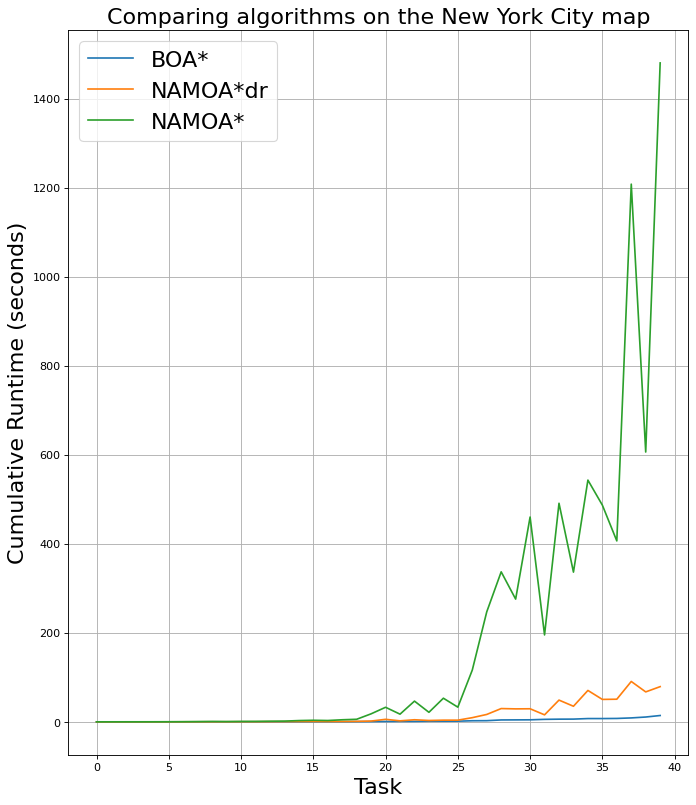

In [4]:
EuclidResults({'BOA*': 'BOAStar_euclid_runtimes.txt', 
               'NAMOA*dr': 'NAMOA_star_dr_euclid_runtimes.txt', 
               'NAMOA*': 'NAMOA_star_euclid_runtimes.txt'}, 'linear', 'BOA_NAMOA_NAMOAdr')

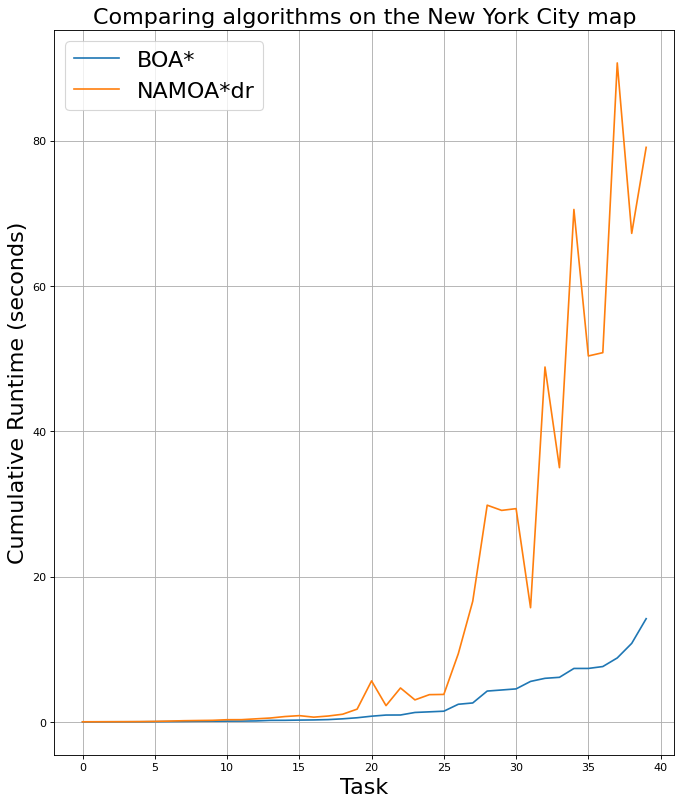

In [5]:
EuclidResults({'BOA*': 'BOAStar_euclid_runtimes.txt', 
               'NAMOA*dr': 'NAMOA_star_dr_euclid_runtimes.txt'}, 'linear', 'BOA_NAMOAdr')

In [6]:
print("New York City")
AllResults('NY', {'NAMOA*': 'results_namoa_star_cal.txt', 
                       'NAMOA*dr': 'results_namoa_star_dr_cal.txt',
                       'BOA*': 'results_boastar_cal.txt'})

New York City


,Final average time per task,Min time per task,Max time per task,Median time per task,95 time percentile,90 time percentile,80 time percentile
NAMOA*,185.95500,0.007113,1480.2100,17.999700,1207.9300,543.03300,406.44000
NAMOA*dr,16.34270,0.006570,90.6902,2.233270,79.0694,67.23110,34.98440
BOA*,2.54078,0.002363,14.1972,0.778755,10.8015,7.61164,5.99125


In [7]:
print("Colorado")
AllResults('COL', {'NAMOA*dr': 'results_namoa_star_dr_cal.txt',
                        'BOA*': 'results_boastar_cal.txt'})

Colorado


,Final average time per task,Min time per task,Max time per task,Median time per task,95 time percentile,90 time percentile,80 time percentile
NAMOA*dr,79.85160,0.008393,1973.480,6.61664,413.0950,99.5720,50.15450
BOA*,9.78043,0.005097,169.747,2.51160,62.2044,20.3503,9.54405


In [8]:
print("San Francisco Bay Area")
AllResults('BAY', {'NAMOA*dr': 'results_namoa_star_dr_cal.txt',
                        'BOA*': 'results_boastar_cal.txt'})

San Francisco Bay Area


,Final average time per task,Min time per task,Max time per task,Median time per task,95 time percentile,90 time percentile,80 time percentile
NAMOA*dr,9.46985,0.002613,78.6086,2.069690,63.1638,44.10860,14.66860
BOA*,2.33046,0.001109,16.8218,0.731742,12.5197,6.40846,4.72066
